### Exploración de datos (EDA)

In [8]:
from pathlib import Path
import pandas as pd

DATA_PATH = Path("../dataset/drug.csv")
df = pd.read_csv(DATA_PATH)

display(df.head())

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
df.shape #Filas x Columnas

(200, 6)

In [10]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    str    
 2   BP           200 non-null    str    
 3   Cholesterol  200 non-null    str    
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    str    
dtypes: float64(1), int64(1), str(4)
memory usage: 9.5 KB


#### Resumen estadistico de las columnas
(numericas y categoricas)

In [ ]:
df.describe(include="all").T
#.T transpone la tabla y deja las columnas como filas

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,200.0,NaN,NaN,NaN,44.315,16.544315,15.0,31.0,45.0,58.0,74.0
Sex,200,2,M,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BP,200,3,HIGH,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cholesterol,200,2,HIGH,103,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Na_to_K,200.0,NaN,NaN,NaN,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247
Drug,200,5,DrugY,91,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df.isna().sum().sort_values(ascending=False).to_frame("missing_values")
# .isna marca cada celda como True si esta vacia (NaN)
# .sum suma los True (NaN) por columna
# .sort_values ordena de mayor a menor
# .to_frame convierte los nuevos resultados "faltantes" a un df de una columna

,missing_values
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


## Paso a paso de EDA

1. Entender variables objetivo y predictoras.
2. Ver distribución de la variable objetivo (`Drug`).
3. Revisar variables categóricas por clase.
4. Revisar variables numéricas y posibles outliers.
5. Ver relación entre numéricas y objetivo.
6. Concluir transformaciones para modelado.

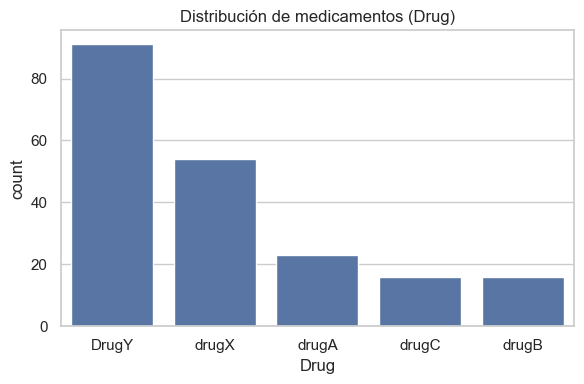

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# 1) Distribución de la variable objetivo
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Drug", order=df["Drug"].value_counts().index)
plt.title("Distribución de medicamentos (Drug)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Conclusion:


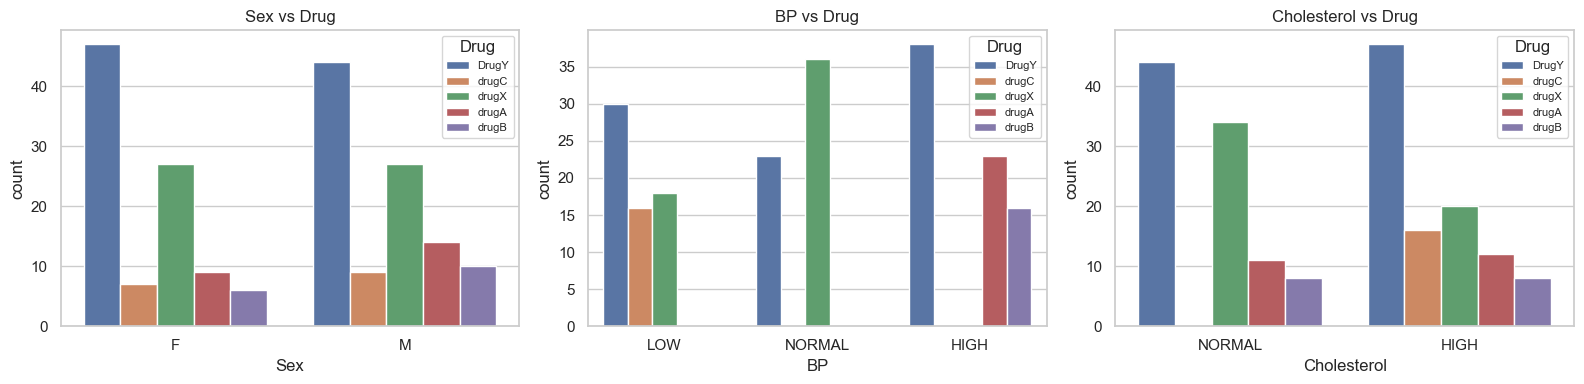

In [27]:
# 2) Variables categóricas vs objetivo
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

sns.countplot(data=df, x="Sex", hue="Drug", ax=axes[0])
axes[0].set_title("Sex vs Drug")

sns.countplot(data=df, x="BP", hue="Drug", ax=axes[1], order=["LOW", "NORMAL", "HIGH"])
axes[1].set_title("BP vs Drug")

sns.countplot(data=df, x="Cholesterol", hue="Drug", ax=axes[2], order=["NORMAL", "HIGH"])
axes[2].set_title("Cholesterol vs Drug")

for ax in axes:
    ax.legend(title="Drug", fontsize=8)

plt.tight_layout()
plt.show()

Conclusion:

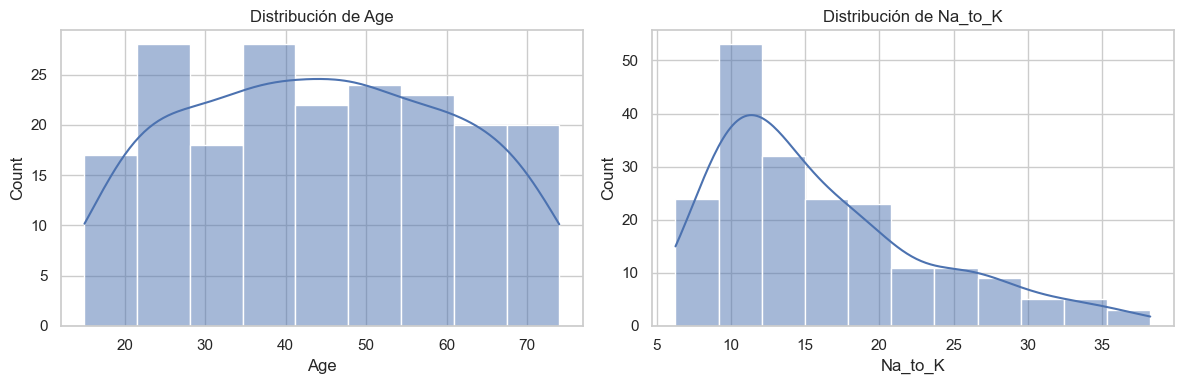

In [28]:
# 3) Variables numéricas
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df["Age"], kde=True, ax=axes[0])
axes[0].set_title("Distribución de Age")

sns.histplot(df["Na_to_K"], kde=True, ax=axes[1])
axes[1].set_title("Distribución de Na_to_K")

plt.tight_layout()
plt.show()

Conclusion:


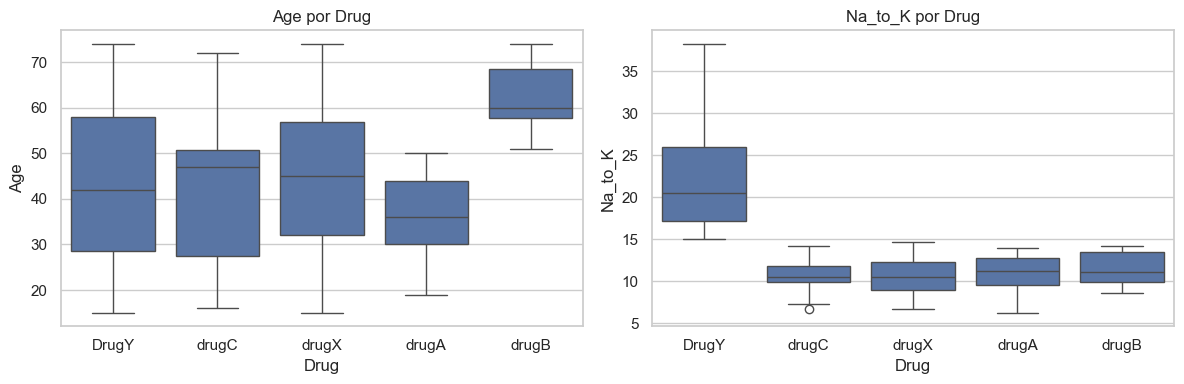

In [29]:
# 4) Relación numéricas con objetivo
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.boxplot(data=df, x="Drug", y="Age", ax=axes[0])
axes[0].set_title("Age por Drug")

sns.boxplot(data=df, x="Drug", y="Na_to_K", ax=axes[1])
axes[1].set_title("Na_to_K por Drug")

plt.tight_layout()
plt.show()

Conclusion:


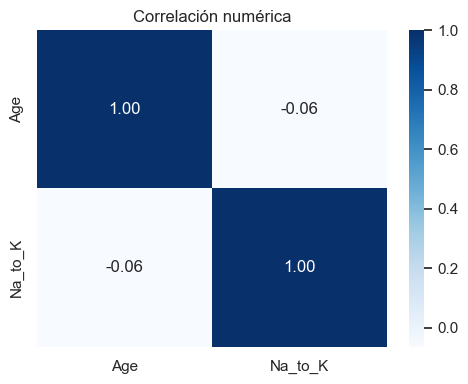

In [30]:
# 5) Correlación entre numéricas
plt.figure(figsize=(5, 4))
num_cols = ["Age", "Na_to_K"]
sns.heatmap(df[num_cols].corr(), annot=True, cmap="Blues", fmt=".2f")
plt.title("Correlación numérica")
plt.tight_layout()
plt.show()

Conclusion:


### Modelo (Random Forest)

Entrenamos el modelo y revisamos métricas como:
- Accuracy
- Precision, Recall y F1-score por clase
- Matriz de confusión

Accuracy: 0.9750

Reporte de clasificación:
              precision    recall  f1-score   support

       DrugY       0.95      1.00      0.97        18
       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         3
       drugX       1.00      0.91      0.95        11

    accuracy                           0.97        40
   macro avg       0.99      0.98      0.99        40
weighted avg       0.98      0.97      0.97        40



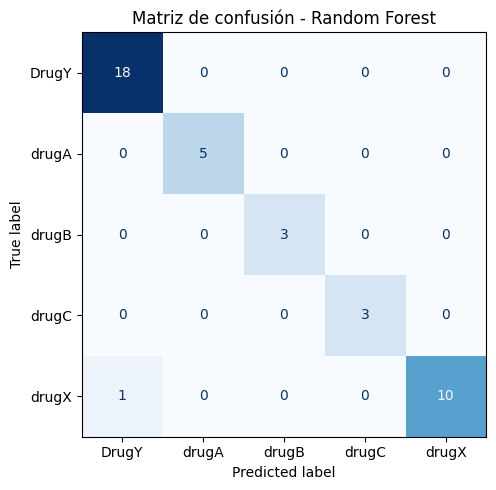

In [2]:
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

feature_columns = ["Age", "Sex", "BP", "Cholesterol", "Na_to_K"]
target_column = "Drug"

X = df[feature_columns]
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y,
)

preprocess = ColumnTransformer(
    transformers=[
        ("categorical", OneHotEncoder(handle_unknown="ignore"), ["Sex", "BP", "Cholesterol"]),
        ("numeric", "passthrough", ["Age", "Na_to_K"]),
    ]
)

rf_model = Pipeline(
    steps=[
        ("preprocess", preprocess),
        ("classifier", RandomForestClassifier(n_estimators=300, random_state=42)),
    ]
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(ax=ax, cmap="Blues", colorbar=False)
plt.title("Matriz de confusión - Random Forest")
plt.tight_layout()
plt.show()